In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

# loading Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skil_list: ast.literal_eval(skil_list) if pd.notna(skil_list) else skil_list)

c:\Users\w\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]


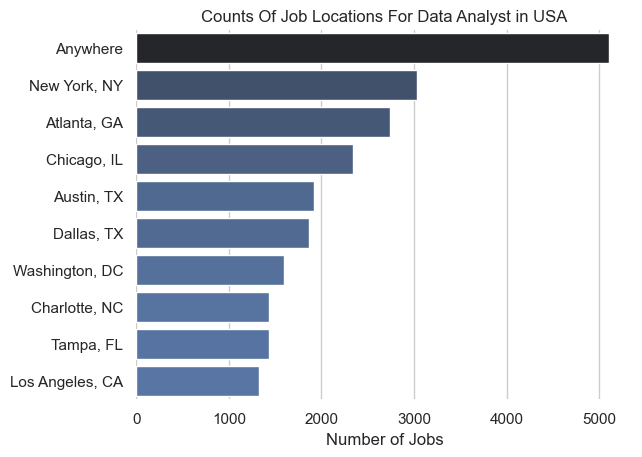

In [23]:
df_location_Plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='whitegrid')
sns.barplot(data=df_location_Plot, x='count', y=df_location_Plot.index, hue='count', palette='dark:b_r', legend=False)
sns.despine(left=True, bottom=True)
plt.title('Counts Of Job Locations For Data Analyst in USA')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()

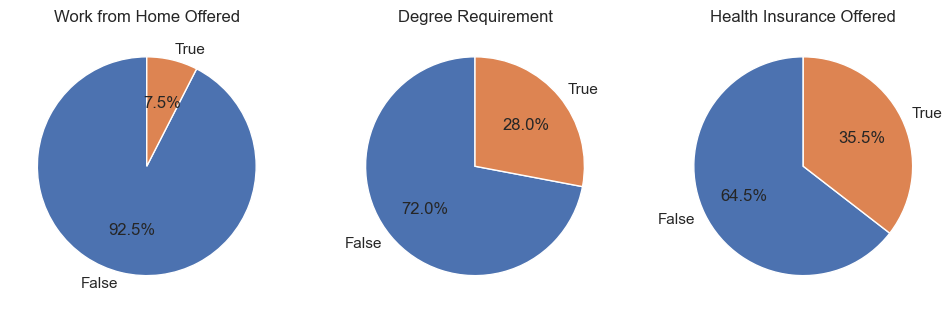

In [26]:
# rewrite the above with a for loop
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

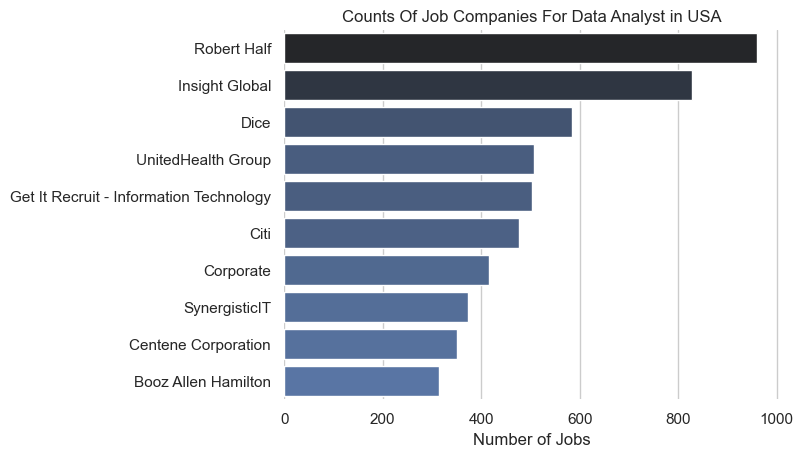

In [ ]:
df_company_name_Plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.barplot(data=df_company_name_Plot, x='count', y=df_company_name_Plot.index, hue='count', palette='dark:b_r', legend=False)
sns.despine(left=True, bottom=True)
plt.title('Counts Of Job Companies For Data Analyst in USA')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()